In [1]:
#importing the required libraries into the notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# reading bitcoin historical data for prediction
BC = pd.read_csv(r"C:\Users\Lathapriya\OneDrive\Documents\Business project\Data\Bitcoin.csv")

In [3]:
#removing the not required variables
del BC['Name']
del BC['Symbol']
del BC['Volume']
del BC['Marketcap']

In [4]:
BC.head()

,Date,High,Low,Open,Close
0,01-05-2015 23:59,238.966003,232.078995,235.938995,232.078995
1,02-05-2015 23:59,235.727005,232.341003,232.341003,234.929993
2,03-05-2015 23:59,243.240005,234.082993,234.880005,240.358002
3,04-05-2015 23:59,242.638001,237.809998,240.356003,239.018005
4,05-05-2015 23:59,239.203995,232.054001,238.852005,236.121002


In [5]:
BC['Date'] = pd.to_datetime(BC['Date']).dt.date

In [6]:
BC.set_index("Date", inplace=True)

In [7]:
#Transforming the data to make it stationar by differencing
BC2= BC.diff()

In [8]:
BC2.head()

,High,Low,Open,Close
Date,,,,
2015-01-05,NaN,NaN,NaN,NaN
2015-02-05,-3.238998,0.262009,-3.597992,2.850998
2015-03-05,7.513001,1.741989,2.539001,5.428009
2015-04-05,-0.602005,3.727005,5.475998,-1.339996
2015-05-05,-3.434006,-5.755997,-1.503998,-2.897003


In [9]:
BC2.dropna(inplace=True)

In [10]:
X=BC2.drop('Close', axis=1)
y=BC2['Close']

In [11]:
#splitting the data has traing data and testing data
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state=7,shuffle=False)

In [13]:
#Applying the SVM model to the transformed data
import time
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR(kernel="rbf")
param_grid = [
        {
            "C": [0.001, 0.005, 0.01, 0.05, 0.1, 1.0, 5.0],
            "epsilon": [0.001, 0.01],
            "gamma": [0.0001, 0.001, 0.01, 0.1, "scale", "auto"]
        }
]


grid_search = GridSearchCV(estimator=svr, 
                        param_grid=param_grid,
                        scoring='neg_mean_squared_error', 
                        return_train_score=True)

start = time.time()
grid_search.fit(X_train, y_train)
duration = time.time() - start
print(f'Took {duration:.3f} seconds')

Took 141.025 seconds


In [14]:
np.sqrt(-grid_search.best_score_)

284.7055321114083

In [15]:
val_scores = grid_search.cv_results_["mean_test_score"]
train_scores = grid_search.cv_results_["mean_train_score"]
params = [str(x) for x in grid_search.cv_results_["params"]]

for val_score, train_score, param in sorted(zip(val_scores, train_scores, params), reverse=True):
    print(np.sqrt(-val_score), np.sqrt(-train_score), param)

284.7055321114083 275.75403853771945 {'C': 5.0, 'epsilon': 0.01, 'gamma': 'scale'}
284.70566845686176 275.7544866676157 {'C': 5.0, 'epsilon': 0.001, 'gamma': 'scale'}
295.43751577998535 292.48438136474084 {'C': 1.0, 'epsilon': 0.001, 'gamma': 'scale'}
295.43813669027736 292.4847912833307 {'C': 1.0, 'epsilon': 0.01, 'gamma': 'scale'}
297.0508041381286 294.60379639446586 {'C': 5.0, 'epsilon': 0.001, 'gamma': 0.0001}
297.0509188662782 294.60384844078834 {'C': 5.0, 'epsilon': 0.01, 'gamma': 0.0001}
299.4683962765608 298.7443726277227 {'C': 1.0, 'epsilon': 0.001, 'gamma': 0.0001}
299.4686508773408 298.7443734523936 {'C': 1.0, 'epsilon': 0.01, 'gamma': 0.0001}
300.1964189519849 299.7339586962805 {'C': 0.1, 'epsilon': 0.001, 'gamma': 'scale'}
300.1967021889195 299.7340263206643 {'C': 0.1, 'epsilon': 0.01, 'gamma': 'scale'}
300.31105901658765 298.04232579524734 {'C': 5.0, 'epsilon': 0.01, 'gamma': 0.001}
300.3110816066411 298.0423215037207 {'C': 5.0, 'epsilon': 0.001, 'gamma': 0.001}
300.51864

In [16]:
from sklearn.metrics import mean_squared_error
best_model = grid_search.best_estimator_

yhat = best_model.predict(X_test)

final_mse = mean_squared_error(y_test, yhat)
final_rmse = np.sqrt(final_mse)
final_rmse

1132.9716690723726

In [17]:
from sklearn import metrics
best_model = grid_search.best_estimator_

yhat = best_model.predict(X_test)

final_mse = mean_squared_error(y_test, yhat)
final_mse

1283624.802920638

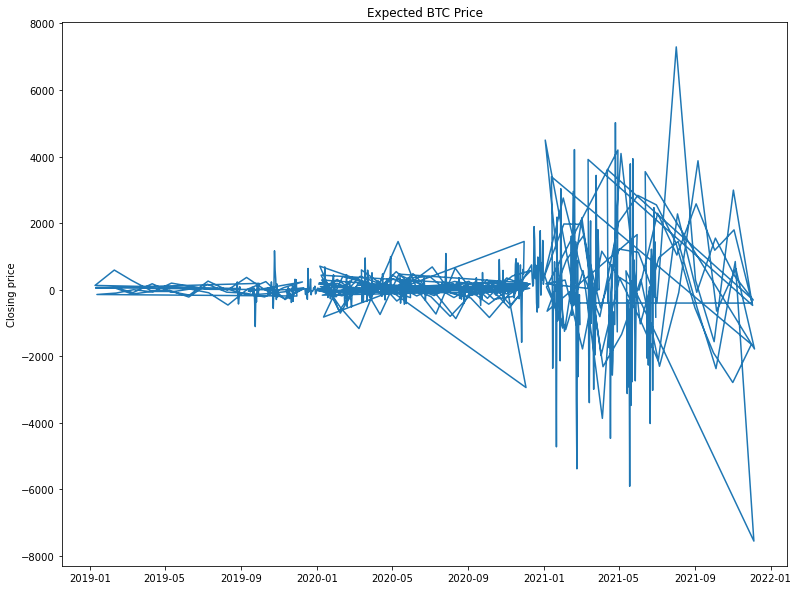

In [18]:
plt.figure(figsize=(13,10))
plt.plot(y_test)
plt.ylabel('Closing price')
plt.title('Expected BTC Price')
plt.show()

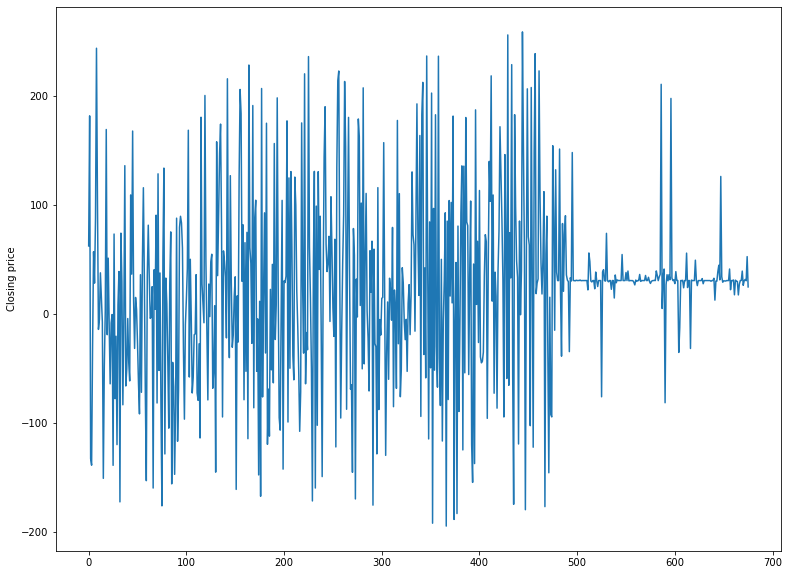

In [19]:
plt.figure(figsize=(13,10))
plt.plot(yhat, label='Predicted')
plt.ylabel('Closing price')
plt.show()

In [26]:
#finding all the statistical perdormance 
from sklearn import metrics
MSE= metrics.mean_squared_error(y_test, yhat)
MAE= metrics.mean_absolute_error(y_test, yhat)
RMSE= np.sqrt(metrics.mean_squared_error(y_test, yhat))
MAPE= metrics.mean_absolute_percentage_error(y_test, yhat)
print (MSE)
print (MAE)
print (RMSE)
print (MAPE)

1283624.802920638
552.2828183341513
1132.9716690723726
1.766449665799421


In [21]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, yhat))
print(metrics.mean_squared_error(y_test, yhat))
print(np.sqrt(metrics.mean_squared_error(y_test, yhat)))
print(metrics.mean_absolute_percentage_error(y_test, yhat))

552.2828183341513
1283624.802920638
1132.9716690723726
1.766449665799421


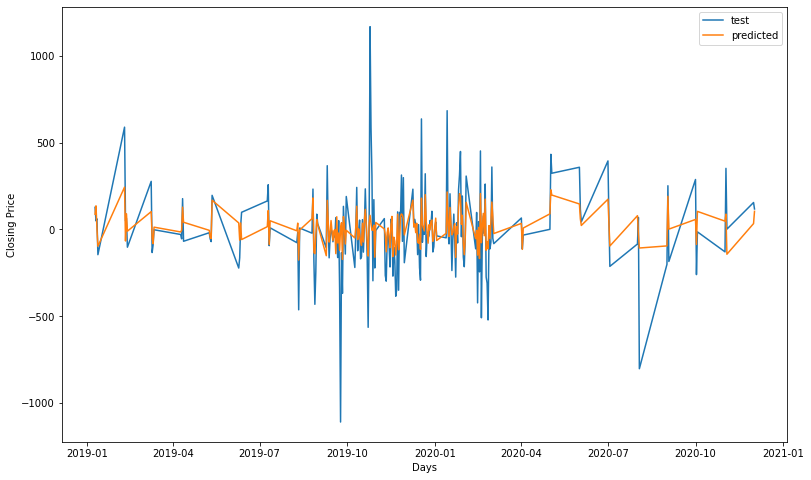

In [22]:
pd.DataFrame({"test": y_test[:200], "predicted": yhat[:200]}).plot(figsize=(13,8))
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.show()